In [1]:
import pandas as pd
df = pd.read_csv('AdhocWork.csv',header=None)
#剔除无关数据
df = df[~(df[0] == '  Priority: 100 Protocol: ns3::olsr::RoutingProtocol')]
df = df[~(df[0] == 'HNA Routing Table: empty')]
df = df[~(df[0] == 'HNA Routing Table:')]
df = df[(df[4] == ' 1               ')]
df = df[~(df[5] == ' Ipv4ListRouting table')]
df = df[~(df[3] == ' Ipv4StaticRouting table')]
df = df[~(df[5] == '      Distance')]
df = df[~(df[5] == ' OLSR Routing table')]

FileNotFoundError: [Errno 2] No such file or directory: 'AdhocWork.csv'

In [16]:
import pandas as pd
df = pd.read_csv('AdhocWork.csv',header = 0)
df

,node,time,destination,nexthop,interface,distance
0,Node: 0,Time: +2s,Time: +2s,Time: +2s,Local time: +2s,Ipv4ListRouting table
1,Priority: 100 Protocol: ns3::olsr::RoutingPr...,NaN,NaN,NaN,NaN,NaN
2,Node: 0,Time: +2s,Time: +2s,Time: +2s,Local time: +2s,OLSR Routing table
3,Node,Time,Destination,NextHop,Interface,Distance
4,HNA Routing Table: empty,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
36566,Priority: 100 Protocol: ns3::olsr::RoutingPr...,NaN,NaN,NaN,NaN,NaN
36567,Node: 49,Time: +98s,Time: +98s,Time: +98s,Local time: +98s,OLSR Routing table
36568,Node,Time,Destination,NextHop,Interface,Distance
36569,Node: 49,Time: +98s,10.1.1.7,10.1.1.7,1,1


In [17]:
df.dropna(inplace = True)
df.drop(df[df['distance']=='      Distance'].index,inplace = True)
df.drop(df[df['distance']==' Ipv4ListRouting table'].index,inplace = True)
df.drop(df[df['distance']==' OLSR Routing table'].index,inplace = True)

In [18]:
mylist = []
for i in range(4,99,2):
    mylist.append(df[df.time == ' Time: +'+str(i)+'s'])
mylist[0]

,node,time,destination,nexthop,interface,distance
257,Node: 0,Time: +4s,10.1.1.25,10.1.1.25,1,1
258,Node: 0,Time: +4s,10.1.1.26,10.1.1.26,1,1
259,Node: 0,Time: +4s,10.1.1.29,10.1.1.29,1,1
260,Node: 0,Time: +4s,10.1.1.31,10.1.1.31,1,1
261,Node: 0,Time: +4s,10.1.1.33,10.1.1.33,1,1
...,...,...,...,...,...,...
708,Node: 48,Time: +4s,10.1.1.29,10.1.1.29,1,1
709,Node: 48,Time: +4s,10.1.1.31,10.1.1.31,1,1
710,Node: 48,Time: +4s,10.1.1.33,10.1.1.33,1,1
711,Node: 48,Time: +4s,10.1.1.47,10.1.1.47,1,1


In [19]:
import numpy as np
listmartix = []

for j in range(len(mylist)):
    martixmap = np.zeros([50,50],dtype = int)
    for i in range(len(mylist[j])):
        prenode = int(mylist[j].iloc[i].node[6:])
        desnode = int(mylist[j].iloc[i].destination[7:])-1
        distance = int(mylist[j].iloc[i].distance)
        #print(prenode,desnode,distance)
        martixmap[prenode,desnode] = distance
        martixmap[desnode,prenode] = distance
    listmartix.append(martixmap)

#print(len(listmartix))


In [21]:
listmartix[0]

array([[0, 0, 0, ..., 0, 1, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [24]:
avgminroute = []
for i in range(48):
    sum = np.sum(listmartix[i].reshape(-1))
    avg = sum/(50*49)
    avgminroute.append(avg)
avgminroute

[0.08734693877551021,
 0.30122448979591837,
 0.33714285714285713,
 0.3722448979591837,
 1.2979591836734694,
 1.2946938775510204,
 1.2428571428571429,
 1.2893877551020407,
 1.3036734693877552,
 1.3473469387755102,
 1.3881632653061224,
 1.270204081632653,
 1.0648979591836734,
 1.0530612244897959,
 0.9583673469387755,
 0.9689795918367347,
 1.1555102040816327,
 1.2351020408163265,
 1.233877551020408,
 0.9787755102040816,
 1.110204081632653,
 0.9077551020408163,
 0.84,
 0.8322448979591837,
 0.7612244897959184,
 0.7828571428571428,
 0.726938775510204,
 0.5653061224489796,
 0.5387755102040817,
 0.4669387755102041,
 0.37510204081632653,
 0.3469387755102041,
 0.36,
 0.33510204081632655,
 0.15836734693877552,
 0.1404081632653061,
 0.13183673469387755,
 0.1346938775510204,
 0.156734693877551,
 0.16326530612244897,
 0.15428571428571428,
 0.1510204081632653,
 0.1436734693877551,
 0.15714285714285714,
 0.20448979591836736,
 0.20081632653061224,
 0.3306122448979592,
 0.3183673469387755]

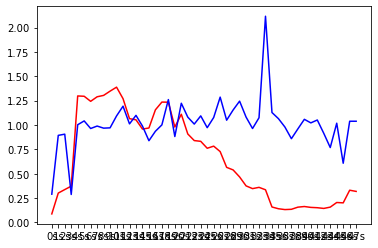

In [28]:
import matplotlib.pyplot as plt
x_time = []
for i in range(48):
    x_time.append(str(i)+'s')
plt.plot(x_time, avgminroute, color = 'red', label = 'avgminroute')
cmp = []
for i in range(47):
    cmp.append(avgminroute[i]/avgminroute[i+1])
cmp.append(cmp[46])
plt.plot(x_time,cmp,color = 'blue', label = 'compare')
plt.show()